# Title: Cancer Therapy and Clonal Hematopoiesis - Analysis

**Author:** Varun Bansal [Intial Draft] <br>
**Creation date:** 24 July 2023 <br>
**Last Updated Date:** 26 July 2023


## Data Source
https://www.cbioportal.org/study/summary?id=msk_ch_2020


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [29]:

# Importing Data
filename = r"msk_ch_2020_clinical_data.tsv" 

df = pd.read_csv(filename,sep='\t') # store as df From a TSV file
pd.set_option('display.max_columns', None)

# Display Data
df.head(5)

,Study ID,Patient ID,Sample ID,Age,Alkylating Agent Treatment,All therapy at MSKCC,Anthracycline Treatment,Antimetobolite Treatment,Cancer Type,Cancer Type Detailed,Carboplatin Treatment,Chemotherapy Treatment,Cisplatin Treatment,Cytotoxic Chemotherapy Treatment,EQD Tertiles,Folic Acid Analog Treatment,Immunotherapy Treatment,Microtubule Damaging Agent,Mutation Count,Nucleoside Analogue Treatment,Oncotree Code,Other Cytotoxic Treatment,Oxaliplatin Treatment,Platinum Treatment,Race,Radiotherapy Treatment,Number of Samples Per Patient,Sex,Smoking Status,Targeted Therapy Treatment,Taxane Treatment,Cumulative Exposure to Alkylatin Agent,Cumulative Exposure to Anthracycline,Cumulative Exposure to Antimetabolite,Cumulative Exposure to Carboplatin,Cumulative Exposure to Cisplatin,Cytotoxic Chemotherapy Treatment Tertile,Cumulative Exposure to Immunotherapy,Cumulative Exposure to Microtubule Damaging Agent,Cumulative Exposure to Other Cytotoxic Therapy,Cumulative Exposure to Oxaliplatin,Cumulative Exposure to Platinum,Cumulative Exposure to Targeted Therapy,Cumulative Exposure to Taxane,Cumulative Exposure to Topoisomerase II Inhibitor,Cumulative Exposure to Topoisomerase I Inhibitor,Time from Diagnosis,Time to Blood Draw from Treatment,TMB (nonsynonymous),Topoisomerase II Inhibitor Treatment,Topoisomerase I Inhibitor Treatment,Treatment Status,Radiation Therapy
0,msk_ch_2020,P-0000004,P-0000004-N01,39.739902,Yes,No,NaN,Yes,Breast Cancer,Invasive Breast Carcinoma,NaN,Yes,Yes,Yes,1st tertile,Yes,NaN,NaN,2.0,Yes,BRCA,NaN,NaN,Yes,White,NaN,1,Female,Never smoker,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991.0,609.0,0.066667,NaN,NaN,Unknown,Yes
1,msk_ch_2020,P-0000015,P-0000015-N01,44.440792,NaN,No,NaN,Yes,Breast Cancer,Invasive Breast Carcinoma,NaN,Yes,NaN,Yes,No radiation,NaN,NaN,NaN,NaN,NaN,BRCA,NaN,NaN,NaN,White,NaN,1,Female,Never smoker,Yes,NaN,NaN,NaN,3rd tertile,NaN,NaN,1st tertile,NaN,NaN,NaN,NaN,NaN,3rd tertile,NaN,NaN,NaN,2558.0,5.0,NaN,NaN,NaN,Unknown,No
2,msk_ch_2020,P-0000023,P-0000023-N01,61.319645,Yes,No,NaN,Yes,Mesothelioma,Peritoneal Mesothelioma,NaN,Yes,Yes,Yes,NaN,Yes,NaN,NaN,NaN,NaN,PEMESO,NaN,NaN,Yes,White,NaN,1,Male,Never smoker,NaN,NaN,1st tertile,NaN,2nd tertile,NaN,3rd tertile,2nd tertile,NaN,NaN,NaN,NaN,3rd tertile,NaN,NaN,NaN,NaN,245.0,166.0,NaN,NaN,NaN,Unknown,NaN
3,msk_ch_2020,P-0000024,P-0000024-N01,61.344284,NaN,No,NaN,NaN,Endometrial Cancer,Other Uterine Tumor,Yes,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,OUTT,NaN,NaN,Yes,White,NaN,1,Female,Former Smoker,NaN,Yes,NaN,NaN,NaN,2nd tertile,NaN,1st tertile,NaN,NaN,NaN,NaN,2nd tertile,NaN,2nd tertile,NaN,NaN,6313.0,91.0,NaN,NaN,NaN,Unknown,NaN
4,msk_ch_2020,P-0000025,P-0000025-N01,72.673508,No,Yes,No,No,Endometrial Cancer,Other Uterine Tumor,Yes,Yes,No,Yes,No radiation,No,No,No,NaN,No,OUTT,No,No,Yes,White,No,1,Female,Former Smoker,Yes,Yes,No treatment,No treatment,No treatment,3rd tertile,No treatment,3rd tertile,No treatment,No treatment,No treatment,No treatment,3rd tertile,2nd tertile,3rd tertile,No treatment,No treatment,1161.0,1097.0,NaN,No,No,Treated,No


### Show the information of the dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24146 entries, 0 to 24145
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Study ID                                           24146 non-null  object 
 1   Patient ID                                         24146 non-null  object 
 2   Sample ID                                          24146 non-null  object 
 3   Age                                                24146 non-null  float64
 4   Alkylating Agent Treatment                         11111 non-null  object 
 5   All therapy at MSKCC                               24146 non-null  object 
 6   Anthracycline Treatment                            10898 non-null  object 
 7   Antimetobolite Treatment                           11975 non-null  object 
 8   Cancer Type                                        24037 non-null  object 
 9   Cancer

#### Show the sum of missing values of features in the dataset

In [31]:
for i in range(len(df.columns)):
    missing_data = df.iloc[:, i].isna( ).sum( )
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 0  |  Percentage: 0.0
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 13035  |  Percentage: 53.98
Feature 6 >> Missing entries: 0  |  Percentage: 0.0
Feature 7 >> Missing entries: 13248  |  Percentage: 54.87
Feature 8 >> Missing entries: 12171  |  Percentage: 50.41
Feature 9 >> Missing entries: 109  |  Percentage: 0.45
Feature 10 >> Missing entries: 109  |  Percentage: 0.45
Feature 11 >> Missing entries: 13147  |  Percentage: 54.45
Feature 12 >> Missing entries: 9746  |  Percentage: 40.36
Feature 13 >> Missing entries: 13339  |  Percentage: 55.24
Feature 14 >> Missing entries: 10743  |  Percentage: 44.49
Feature 15 >> Missing entries: 11953  |  Percentage: 49.5
Feature 16 >> Missing entries: 13558  |  Percentage: 56.15
Feature 17 >> Missing entries: 13324  |  Percentage: 55.18
Feature 18 >> Missing entries: 13683  |  Per

#### There are around 52 columns in the dataset, we will keep on 12-13 for our analysis.

In [32]:
columns_to_keep = ['Patient ID', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed', 'Number of Samples Per Patient', 'Mutation Count', 'Age', 'Sex', 'Race', 'Smoking Status', 'Time from Diagnosis', 'Treatment Status', 'Chemotherapy Treatment', 'Radiation Therapy', 'Radiotherapy Treatment']
df = df[columns_to_keep]

In [33]:
df.head(5)

,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Number of Samples Per Patient,Mutation Count,Age,Sex,Race,Smoking Status,Time from Diagnosis,Treatment Status,Chemotherapy Treatment,Radiation Therapy,Radiotherapy Treatment
0,P-0000004,P-0000004-N01,Breast Cancer,Invasive Breast Carcinoma,1,2.0,39.739902,Female,White,Never smoker,991.0,Unknown,Yes,Yes,NaN
1,P-0000015,P-0000015-N01,Breast Cancer,Invasive Breast Carcinoma,1,NaN,44.440792,Female,White,Never smoker,2558.0,Unknown,Yes,No,NaN
2,P-0000023,P-0000023-N01,Mesothelioma,Peritoneal Mesothelioma,1,NaN,61.319645,Male,White,Never smoker,245.0,Unknown,Yes,NaN,NaN
3,P-0000024,P-0000024-N01,Endometrial Cancer,Other Uterine Tumor,1,NaN,61.344284,Female,White,Former Smoker,6313.0,Unknown,Yes,NaN,NaN
4,P-0000025,P-0000025-N01,Endometrial Cancer,Other Uterine Tumor,1,NaN,72.673508,Female,White,Former Smoker,1161.0,Treated,Yes,No,No


#### Checking for missing values

In [34]:
for i in range(len(df.columns)):
    missing_data = df.iloc[:, i].isna( ).sum( )
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 109  |  Percentage: 0.45
Feature 4 >> Missing entries: 109  |  Percentage: 0.45
Feature 5 >> Missing entries: 0  |  Percentage: 0.0
Feature 6 >> Missing entries: 17497  |  Percentage: 72.46
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 1065  |  Percentage: 4.41
Feature 10 >> Missing entries: 932  |  Percentage: 3.86
Feature 11 >> Missing entries: 1  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 9746  |  Percentage: 40.36
Feature 14 >> Missing entries: 11721  |  Percentage: 48.54
Feature 15 >> Missing entries: 13887  |  Percentage: 57.51


#### Will futher delete Feature 6 and 15 as it mostly has NULL values

In [35]:
df = df.drop('Mutation Count', axis=1)


In [36]:
df = df.drop('Radiotherapy Treatment', axis=1)

#### Fill missing values with a specific value

In [39]:
#Fill missing values with a specific value (e.g., 'No')
df['Radiation Therapy'].fillna('No', inplace=True)

In [40]:
df.head(5)

,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Number of Samples Per Patient,Age,Sex,Race,Smoking Status,Time from Diagnosis,Treatment Status,Chemotherapy Treatment,Radiation Therapy
0,P-0000004,P-0000004-N01,Breast Cancer,Invasive Breast Carcinoma,1,39.739902,Female,White,Never smoker,991.0,Unknown,Yes,Yes
1,P-0000015,P-0000015-N01,Breast Cancer,Invasive Breast Carcinoma,1,44.440792,Female,White,Never smoker,2558.0,Unknown,Yes,No
2,P-0000023,P-0000023-N01,Mesothelioma,Peritoneal Mesothelioma,1,61.319645,Male,White,Never smoker,245.0,Unknown,Yes,No
3,P-0000024,P-0000024-N01,Endometrial Cancer,Other Uterine Tumor,1,61.344284,Female,White,Former Smoker,6313.0,Unknown,Yes,No
4,P-0000025,P-0000025-N01,Endometrial Cancer,Other Uterine Tumor,1,72.673508,Female,White,Former Smoker,1161.0,Treated,Yes,No


# Data Visualizations

### Visualize the distribution of 'Age' using a histogram

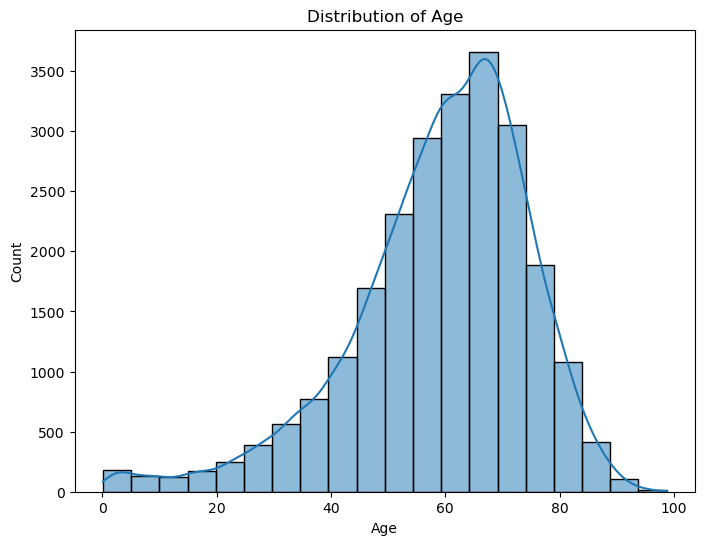

In [15]:
# Let's visualize the distribution of 'Age' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Bar Plot for Cancer Types:

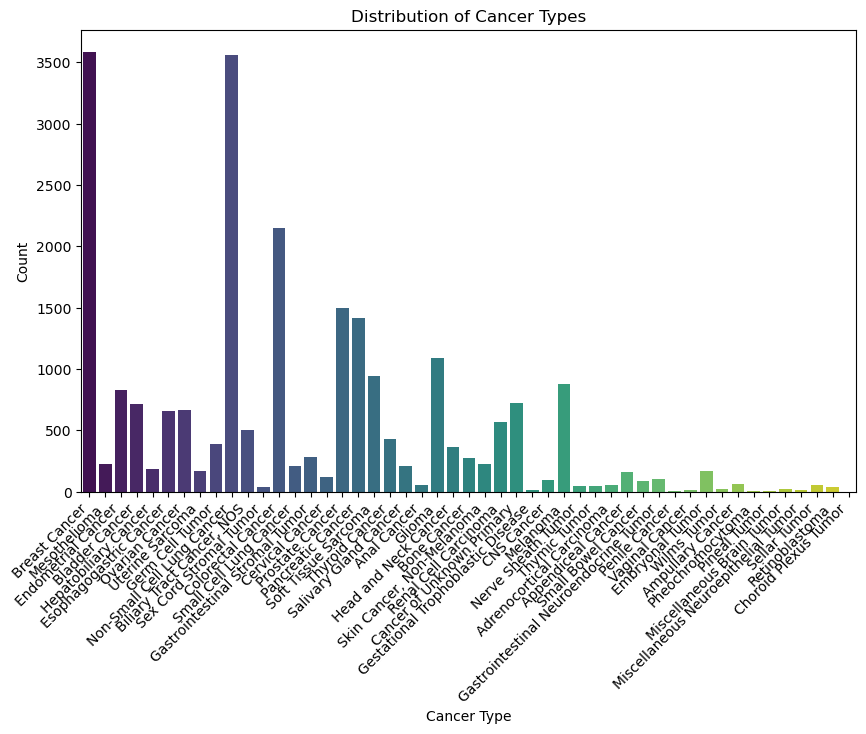

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cancer Type', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.show()


### Box Plot for Age and Cancer Type:

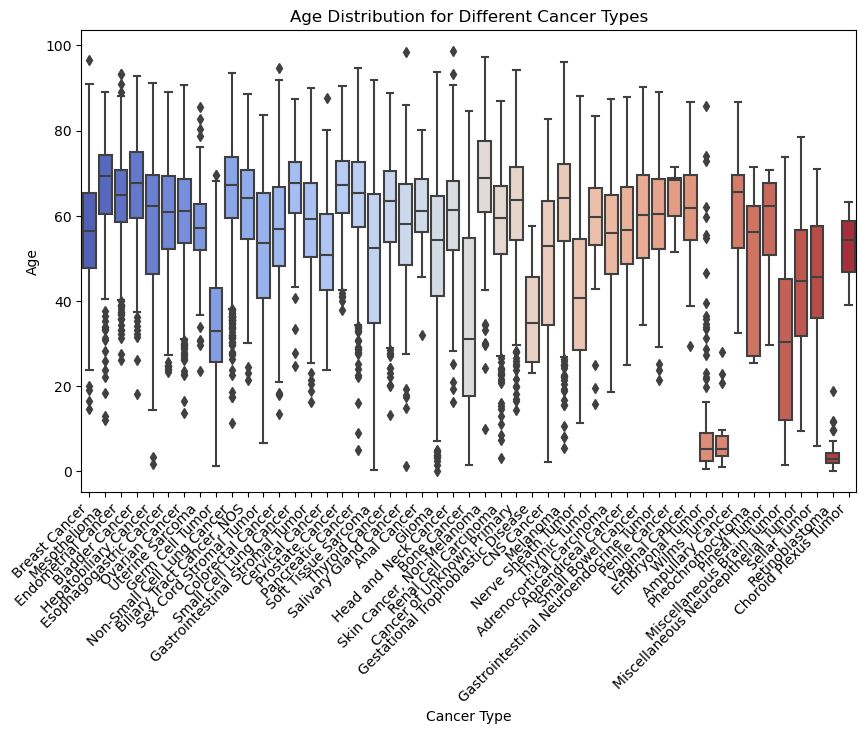

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer Type', y='Age', data=df, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Age Distribution for Different Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Age')
plt.show()


### Violin Plot for Smoking Status and Age:

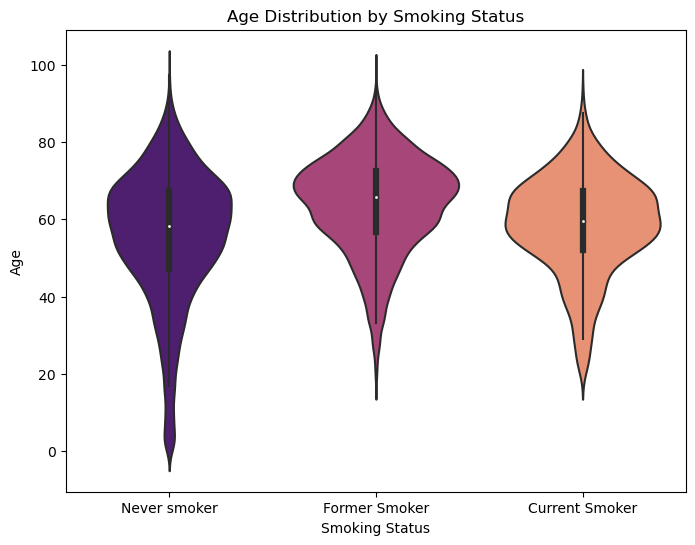

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Smoking Status', y='Age', data=df, palette='magma')
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.show()


### Heatmap for Correlation:

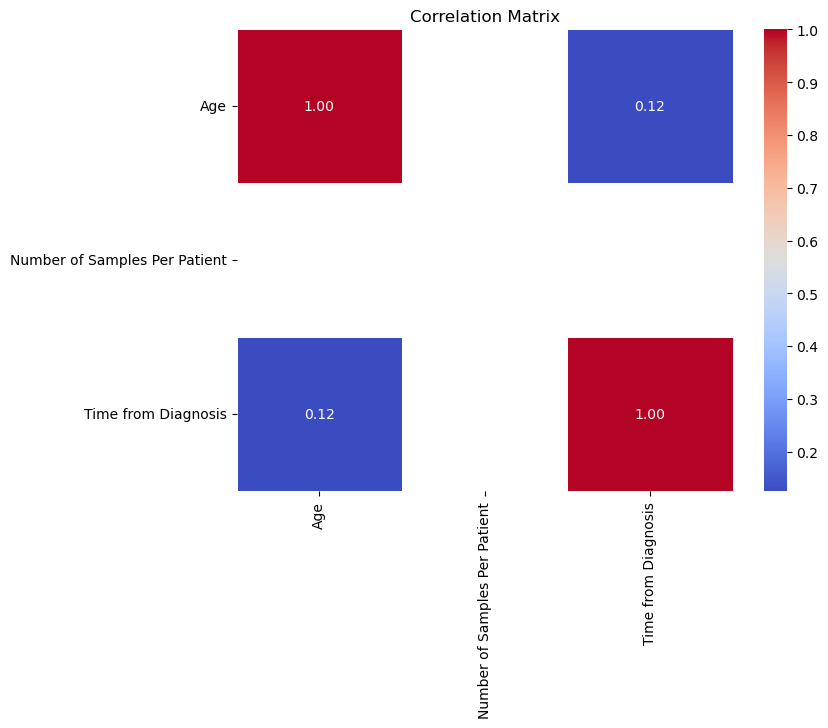

In [20]:
correlation_matrix = df[['Age', 'Number of Samples Per Patient', 'Time from Diagnosis']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Pie Chart for Gender Distribution

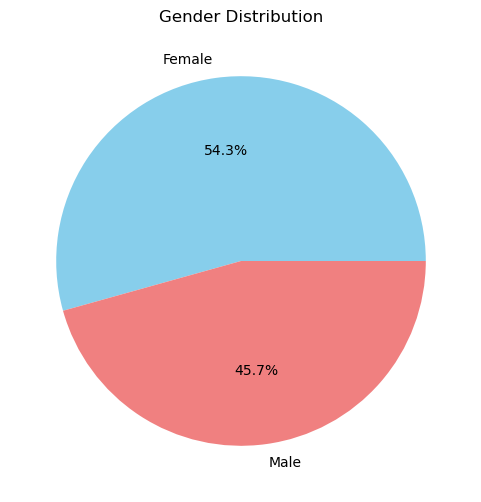

In [21]:
plt.figure(figsize=(6, 6))
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


### Distribution of Cancer Types by Race

<Figure size 1200x600 with 0 Axes>

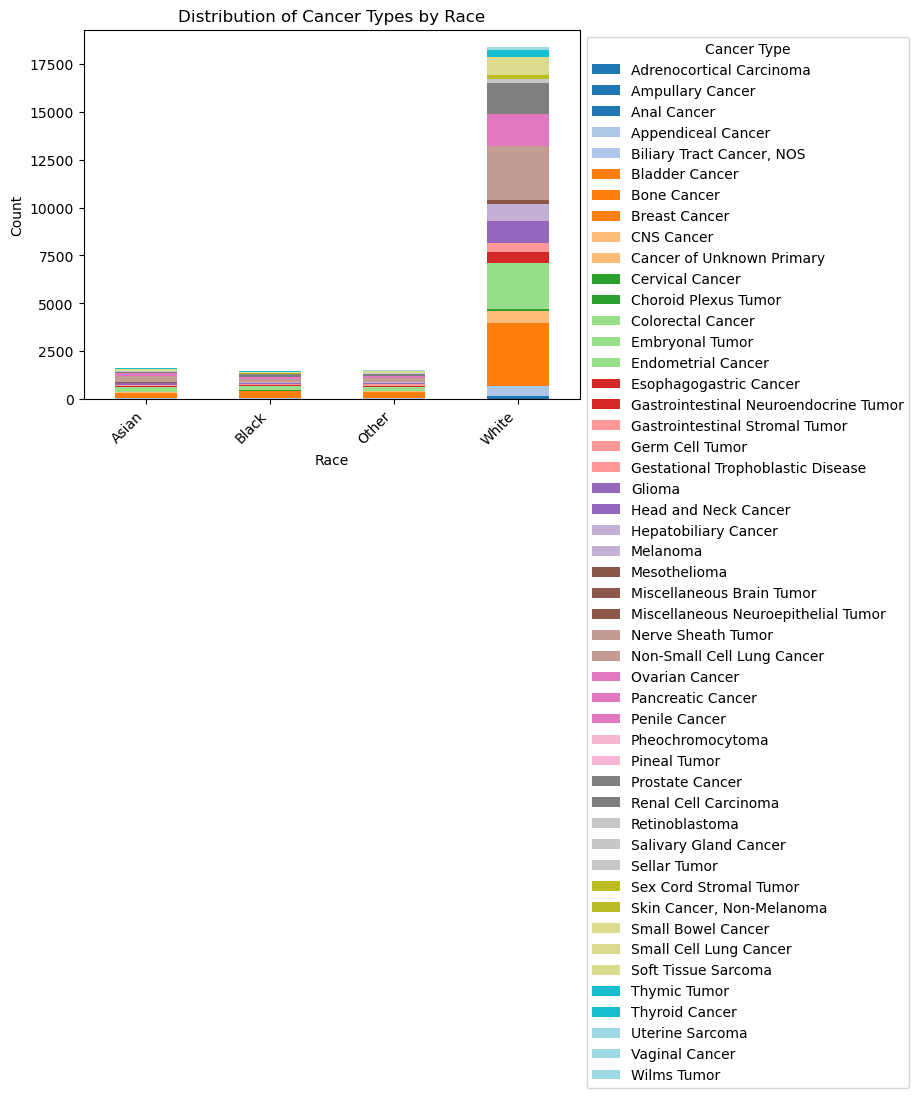

In [22]:
plt.figure(figsize=(12, 6))
race_cancer_counts = df.groupby(['Race', 'Cancer Type']).size().unstack(fill_value=0)
race_cancer_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Distribution of Cancer Types by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Cancer Type', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()


### Histogram of Time from Diagnosis:

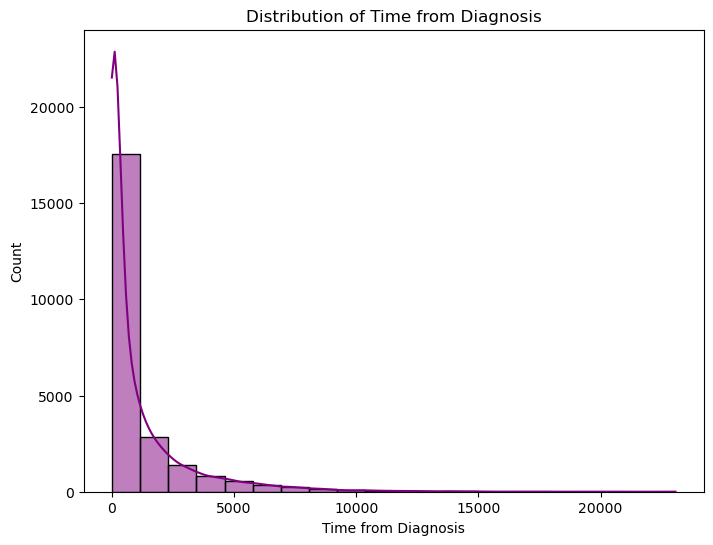

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Time from Diagnosis'], bins=20, kde=True, color='purple')
plt.title('Distribution of Time from Diagnosis')
plt.xlabel('Time from Diagnosis')
plt.ylabel('Count')
plt.show()


### 